# Insurance claim amount prediction

# Import libraries

In [1]:
# Import Libraries
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math

# Load the generated Dataset

In [2]:
df = pd.read_csv("insurance_dataset_corr.csv")

In [3]:
df.head(5)

,Policy_number,Type,Coverage,Coverage_Add_Ons,Policy_Status,Validity,Insured_amount,Premium_amount,Issuance_date,Policy_holder_name,...,Driver_history,Driving_experience,Previous_traffic_violations,License_expiry_date,Driver_address,Driver_contact_details,Driver_medical_history,Alcohol_drug_test_results,License_class_if_applicable,License_Type
0,POL91142091,Car Insurance,Comprehensive,Road side assistance (24*7),Suspended,2024-12-12 to 2025-08-22,1788284,68210,2025-03-10,Karen Walsh,...,Clean driving record,6,1 parking violation,2025-05-25,846 Brittany Trail Suite 526\nWest Richardshir...,"+1-968-219-7322, ggoodwin@example.net",Hypertension,Passed,HGV,Permanent
1,POL99025488,Car Insurance,Third Party,No Claim Bonus,Cancelled,2024-04-04 to 2025-11-17,1268543,38634,2024-07-07,Amanda Carter DDS,...,Clean driving record,1,1 speeding,2027-01-28,"82136 Hughes Turnpike\nLaurieport, MT 16282","(793)957-4631x775, joseph74@example.com",Asthma,Passed,LMV,Learning
2,POL23635842,Car Insurance,Accidental Coverage,Road side assistance (24*7),Effective,2025-02-06 to 2026-02-04,660740,18084,2024-06-17,Jessica Ray,...,One speeding ticket,15,1 speeding,2029-09-13,"45921 Travis Station\nScottport, NV 50984","339-322-7271x71602, petersjessica@example.com",Diabetes,Failed,HGV,Learning
3,POL67645878,Car Insurance,Accidental Coverage,No Claim Bonus,Effective,2025-02-19 to 2026-02-14,1073115,41030,2024-06-15,Michelle Riley,...,One traffic violation,11,1 parking violation,2025-05-26,"40595 Butler Square Suite 784\nGraystad, MO 88166","2578130598, karen37@example.com",No major medical issues,Failed,LMV,Learning
4,POL63547538,Car Insurance,Comprehensive,Road side assistance (24*7),Cancelled,2025-02-09 to 2025-12-18,592923,9148,2024-08-22,Meghan Taylor,...,2 minor accidents,11,1 parking violation,2026-09-20,"09138 Allen Shores\nSouth Marco, AS 60302","650-431-9774x882, kathryn58@example.com",No major medical issues,Failed,LMV,Learning


# EDA - Exploratory Data Analysis

In [4]:
# Number of attributes and records in the dataset
df.shape

(5000, 114)

# Data Preprocessing 

Step1 - Drop nominal attributes

In [5]:
df = df.drop(['Policy_holder_name'], axis=1)
df = df.drop(['Claimant_name'], axis=1)
df = df.drop(['Relationship'], axis=1)
df = df.drop(['Address'], axis=1)
df = df.drop(['Claimant_occupation'], axis=1)
df = df.drop(['Marital_status'], axis=1)
df = df.drop(['Emergency_contact_information'], axis=1)
df = df.drop(['Phone_Number'], axis=1)
df = df.drop(['Email'], axis=1)
df = df.drop(['Registration_number'], axis=1)
df = df.drop(['Make'], axis=1)
df = df.drop(['Model'], axis=1)
df = df.drop(['Year'], axis=1)
df = df.drop(['Engine_Chassis_number'], axis=1)
df = df.drop(['Color'], axis=1)
df = df.drop(['Date'], axis=1)
df = df.drop(['Police_report'], axis=1)
df = df.drop(['Time'], axis=1)
df = df.drop(['Witnesses'], axis=1)
df = df.drop(['Accident_scene_photos_videos'], axis=1)
df = df.drop(['Surveyor_report'], axis=1)
df = df.drop(['Total_Loss_Evaluation'], axis=1)
df = df.drop(['Repair_shop_details'], axis=1)
df = df.drop(['Claim_Form'], axis=1)
df = df.drop(['FIR'], axis=1)
df = df.drop(['Repair_estimate_bill'], axis=1)
df = df.drop(['Supporting_documents'], axis=1)
df = df.drop(['Payment_details'], axis=1)
df = df.drop(['Claim_history_report'], axis=1)
df = df.drop(['Injury_details'], axis=1)
df = df.drop(['Medical_bills'], axis=1)
df = df.drop(['Hospitalization_details'], axis=1)
df = df.drop(['Treatment_type'], axis=1)
df = df.drop(['Medical_reports'], axis=1)
df = df.drop(['Doctor_statement'], axis=1)
df = df.drop(['Prescription_details'], axis=1)
df = df.drop(['Physiotherapy_details'], axis=1)
df = df.drop(['Compliance_check_list'], axis=1)
df = df.drop(['Legal_obligations_if_any'], axis=1)
df = df.drop(['Forensic_examination_if_any'], axis=1)
df = df.drop(['Claims_audit_findings'], axis=1)
df = df.drop(['Claim_review_history'], axis=1)
df = df.drop(['Internal_audit_report'], axis=1)
df = df.drop(['Supervisor_Manager_approval'], axis=1)
df = df.drop(['Driver_address'], axis=1)
df = df.drop(['Driver_contact_details'], axis=1)
df = df.drop(['Driver_medical_history'], axis=1)

In [6]:
df.shape

(5000, 67)

Dropped irrelevent attributes from the dataset that are not useful for generating the correlation of claim amount

Step2 - Check the datatype for the attributes

In [7]:
df.dtypes

Policy_number                  object
Type                           object
Coverage                       object
Coverage_Add_Ons               object
Policy_Status                  object
                                ...  
Previous_traffic_violations    object
License_expiry_date            object
Alcohol_drug_test_results      object
License_class_if_applicable    object
License_Type                   object
Length: 67, dtype: object

Step3: Check for any duplicate data

In [8]:
#Duplicate Data
# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated(keep='last')]

# To see the results
duplicate_rows

,Policy_number,Type,Coverage,Coverage_Add_Ons,Policy_Status,Validity,Insured_amount,Premium_amount,Issuance_date,Payment_status,...,Claim_verification,Fraud_detection_approval,Driver_license,Driver_history,Driving_experience,Previous_traffic_violations,License_expiry_date,Alcohol_drug_test_results,License_class_if_applicable,License_Type


Step4: Check for any missing data

In [9]:
#Check for the count of missing data in each attribute
df.isnull().sum()

Policy_number                  0
Type                           0
Coverage                       0
Coverage_Add_Ons               0
Policy_Status                  0
                              ..
Previous_traffic_violations    0
License_expiry_date            0
Alcohol_drug_test_results      0
License_class_if_applicable    0
License_Type                   0
Length: 67, dtype: int64

# Check for Data Inconsisteny

Step5: Outlier Analysis for Numerical attributes using Box Plot analysis

In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['Insured_amount', 'Premium_amount', 'Claimant_age',
       'Vehicle_value_market_value', 'Odometer_reading', 'Extent_of_damage',
       'Repair_estimates', 'Repair_Cost', 'Depreciation', 'Salvage_value',
       'Insurance_settlement_amount', 'Repair_duration', 'Claim_amount',
       'Deductibles', 'Previous_claims', 'Loss_of_wages',
       'Driving_experience'],
      dtype='object')


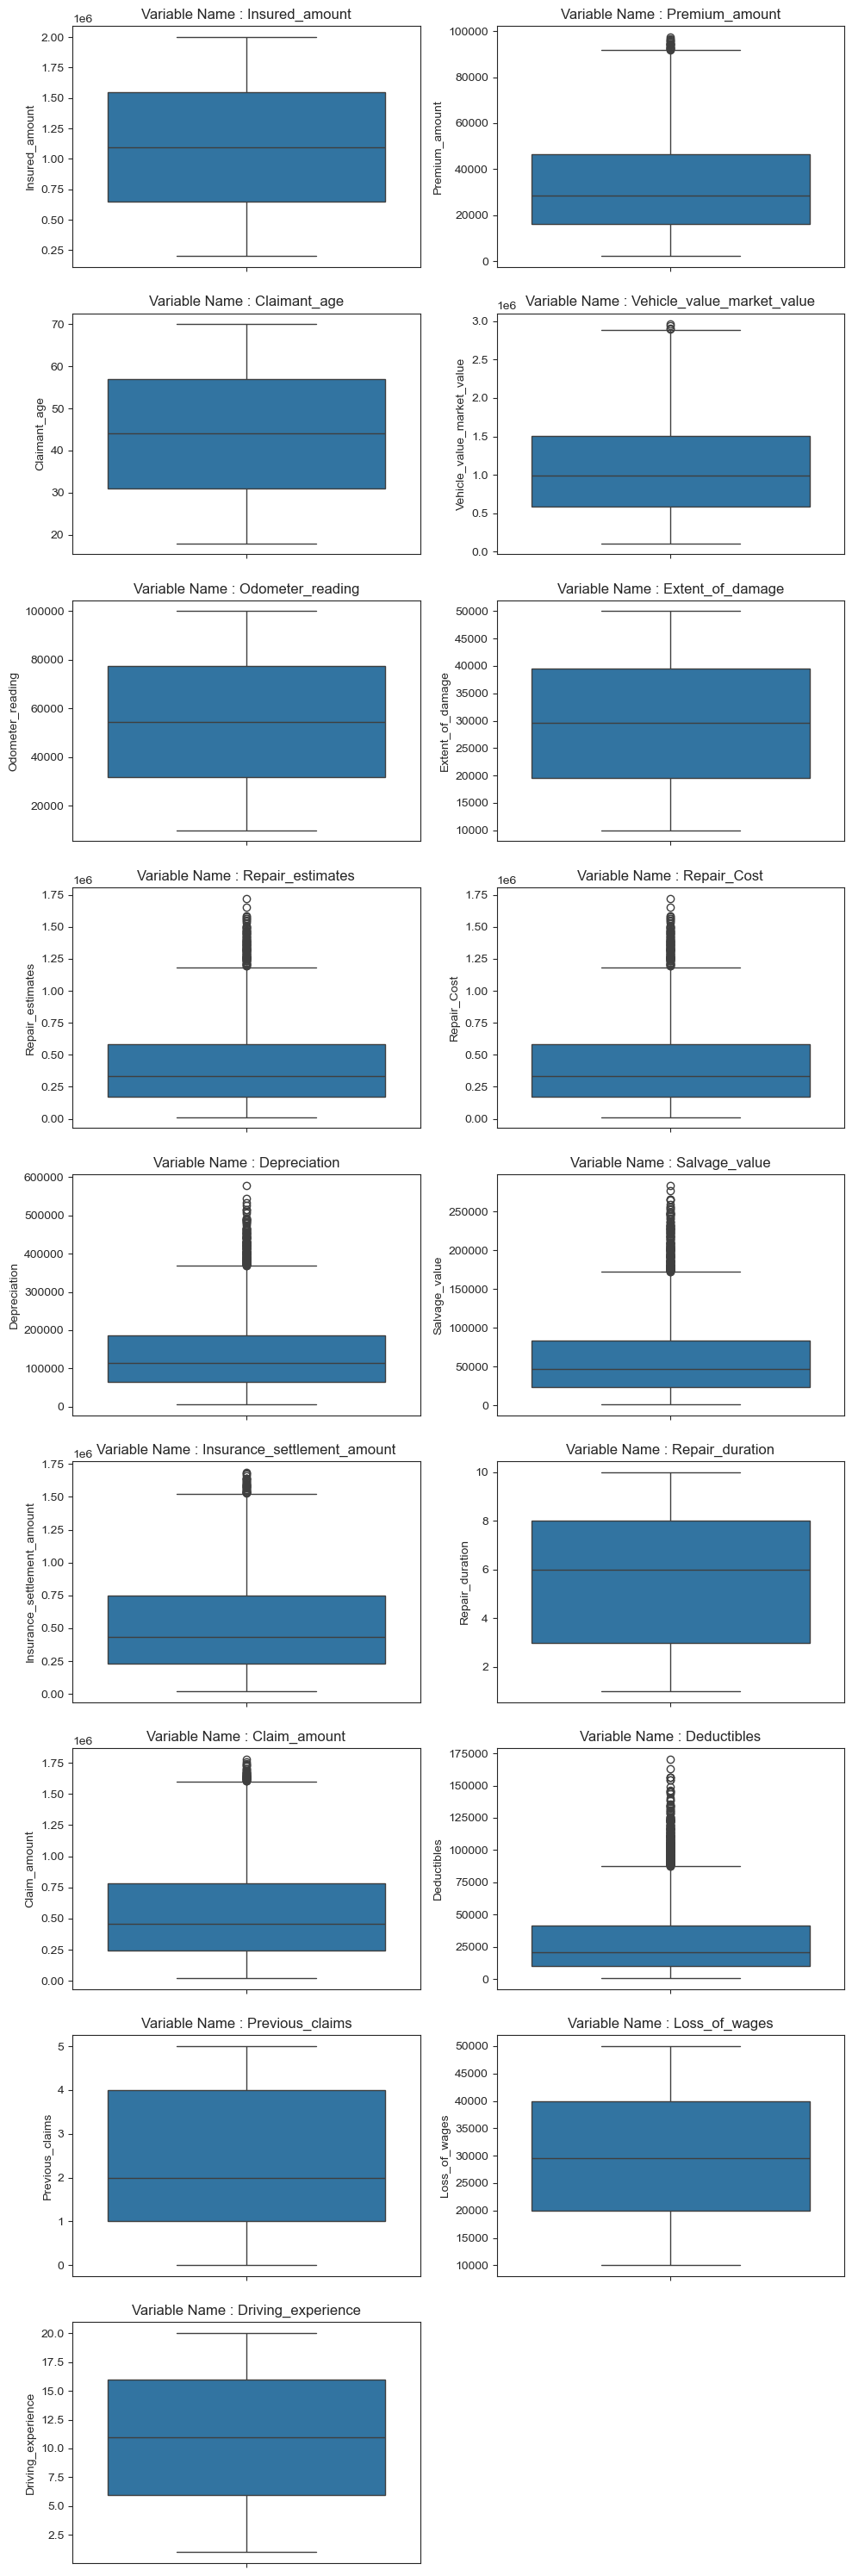

In [11]:

#list1 = ["Insured_amount", "Premium_amount", "Claim_amount", "Deductibles", "Vehicle_value_market_value", "Repair_estimates", "Depreciation", "Salvage_value", "Insurance_settlement_amount"]
df_new = df[numerical_cols]
# Boxplot
sns.set_style("ticks") 
  

cols = df_new.columns
  
# Plot build for each variable 
plt.figure(figsize=(10, 30) )
for count, item in enumerate(cols, 1): 
    plt.subplot(9, 2, count) 
    sns.boxplot(df_new[item])
    plt.title(f"Variable Name : {item}")

plt.tight_layout() 
plt.show() 

Features with outliers based on above Box Plot analyis - 'Premium_amount', 'Vehicle_value_market_value', 'Repair_estimates', 'Repair_Cost', 'Depreciation', 'Salvage_value', 'Insurance_settlement_amount''Claim_amount', 'Deductibles'. 

In [12]:
# List of numerical attributes with outliers
numerical_columns = ['Premium_amount', 'Vehicle_value_market_value', 'Repair_estimates', 'Repair_Cost', 'Depreciation', 'Salvage_value', 'Insurance_settlement_amount','Claim_amount', 'Deductibles']

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
df_cleaned = remove_outliers(df, numerical_columns)

# Print the cleaned DataFrame
print(df_cleaned.describe())
# Export the cleaned DataFrame to a CSV file
#df_cleaned.to_csv('insurance_dataset_cleaned.csv', index=False)

       Insured_amount  Premium_amount  Claimant_age  \
count    4.346000e+03     4346.000000    4346.00000   
mean     1.004248e+06    30340.959733      43.88081   
std      4.849714e+05    19335.972721      15.19109   
min      2.001080e+05     2143.000000      18.00000   
25%      5.865832e+05    14909.250000      31.00000   
50%      9.869465e+05    25802.500000      44.00000   
75%      1.393597e+06    42690.250000      57.00000   
max      1.999703e+06    91753.000000      70.00000   

       Vehicle_value_market_value  Odometer_reading  Extent_of_damage  \
count                4.346000e+03       4346.000000       4346.000000   
mean                 9.766470e+05      54718.543488      29746.893925   
std                  5.415278e+05      26047.139761      11509.283658   
min                  1.110929e+05      10025.000000      10006.000000   
25%                  5.450922e+05      31711.750000      19692.250000   
50%                  8.949684e+05      54421.500000      29684.500

In [13]:
df_cleaned.head(5)

,Policy_number,Type,Coverage,Coverage_Add_Ons,Policy_Status,Validity,Insured_amount,Premium_amount,Issuance_date,Payment_status,...,Claim_verification,Fraud_detection_approval,Driver_license,Driver_history,Driving_experience,Previous_traffic_violations,License_expiry_date,Alcohol_drug_test_results,License_class_if_applicable,License_Type
0,POL91142091,Car Insurance,Comprehensive,Road side assistance (24*7),Suspended,2024-12-12 to 2025-08-22,1788284,68210,2025-03-10,Paid,...,True,True,DL1927770604,Clean driving record,6,1 parking violation,2025-05-25,Passed,HGV,Permanent
1,POL99025488,Car Insurance,Third Party,No Claim Bonus,Cancelled,2024-04-04 to 2025-11-17,1268543,38634,2024-07-07,Pending,...,True,False,DL8476940969,Clean driving record,1,1 speeding,2027-01-28,Passed,LMV,Learning
2,POL23635842,Car Insurance,Accidental Coverage,Road side assistance (24*7),Effective,2025-02-06 to 2026-02-04,660740,18084,2024-06-17,Paid,...,True,False,DL3072939753,One speeding ticket,15,1 speeding,2029-09-13,Failed,HGV,Learning
3,POL67645878,Car Insurance,Accidental Coverage,No Claim Bonus,Effective,2025-02-19 to 2026-02-14,1073115,41030,2024-06-15,Paid,...,False,True,DL8035241735,One traffic violation,11,1 parking violation,2025-05-26,Failed,LMV,Learning
4,POL63547538,Car Insurance,Comprehensive,Road side assistance (24*7),Cancelled,2025-02-09 to 2025-12-18,592923,9148,2024-08-22,Pending,...,False,True,DL1710473124,2 minor accidents,11,1 parking violation,2026-09-20,Failed,LMV,Learning


In [14]:
df_cleaned.shape

(4346, 67)

In [15]:
from datetime import datetime

# Function to calculate the number of days from the current date to the end date
def calculate_days(validity):
    try:
        # Split the validity into start and end dates
        start_date, end_date = validity.split(' to ')
        
        # Convert the end date to a datetime object
        end_date = datetime.strptime(end_date, '%Y-%m-%d')
        
        # Get the current date
        current_date = datetime.now()
        
        # Calculate the number of days from current date to the end date
        return (end_date - current_date).days
    except Exception as e:
        print(f"Error processing validity: {validity}. Error: {e}")
        return None  # Handle invalid data by returning None or a default value

# Apply the function to the Validity column
df_cleaned['Number_of_days'] = df_cleaned['Validity'].apply(calculate_days)

# Display the DataFrame
print(df_cleaned['Number_of_days'])

0       152
1       239
2       318
3       328
4       270
       ... 
4995    292
4996    114
4997    226
4998    332
4999    279
Name: Number_of_days, Length: 4346, dtype: int64


# Data Transformation

Standardize the data: Standardization is the process of transforming data into a common format which you to make the meaningful comparison.

# Univariate Analysis - Histogram Plot (For visualizing the distribution of numerical data in DataFrame)

Input variables : Index(['Insured_amount', 'Premium_amount', 'Claimant_age',
       'Vehicle_value_market_value', 'Odometer_reading', 'Extent_of_damage',
       'Repair_estimates', 'Repair_Cost', 'Depreciation', 'Salvage_value',
       'Insurance_settlement_amount', 'Repair_duration', 'Claim_amount',
       'Deductibles', 'Previous_claims', 'Loss_of_wages',
       'Driving_experience'],
      dtype='object')


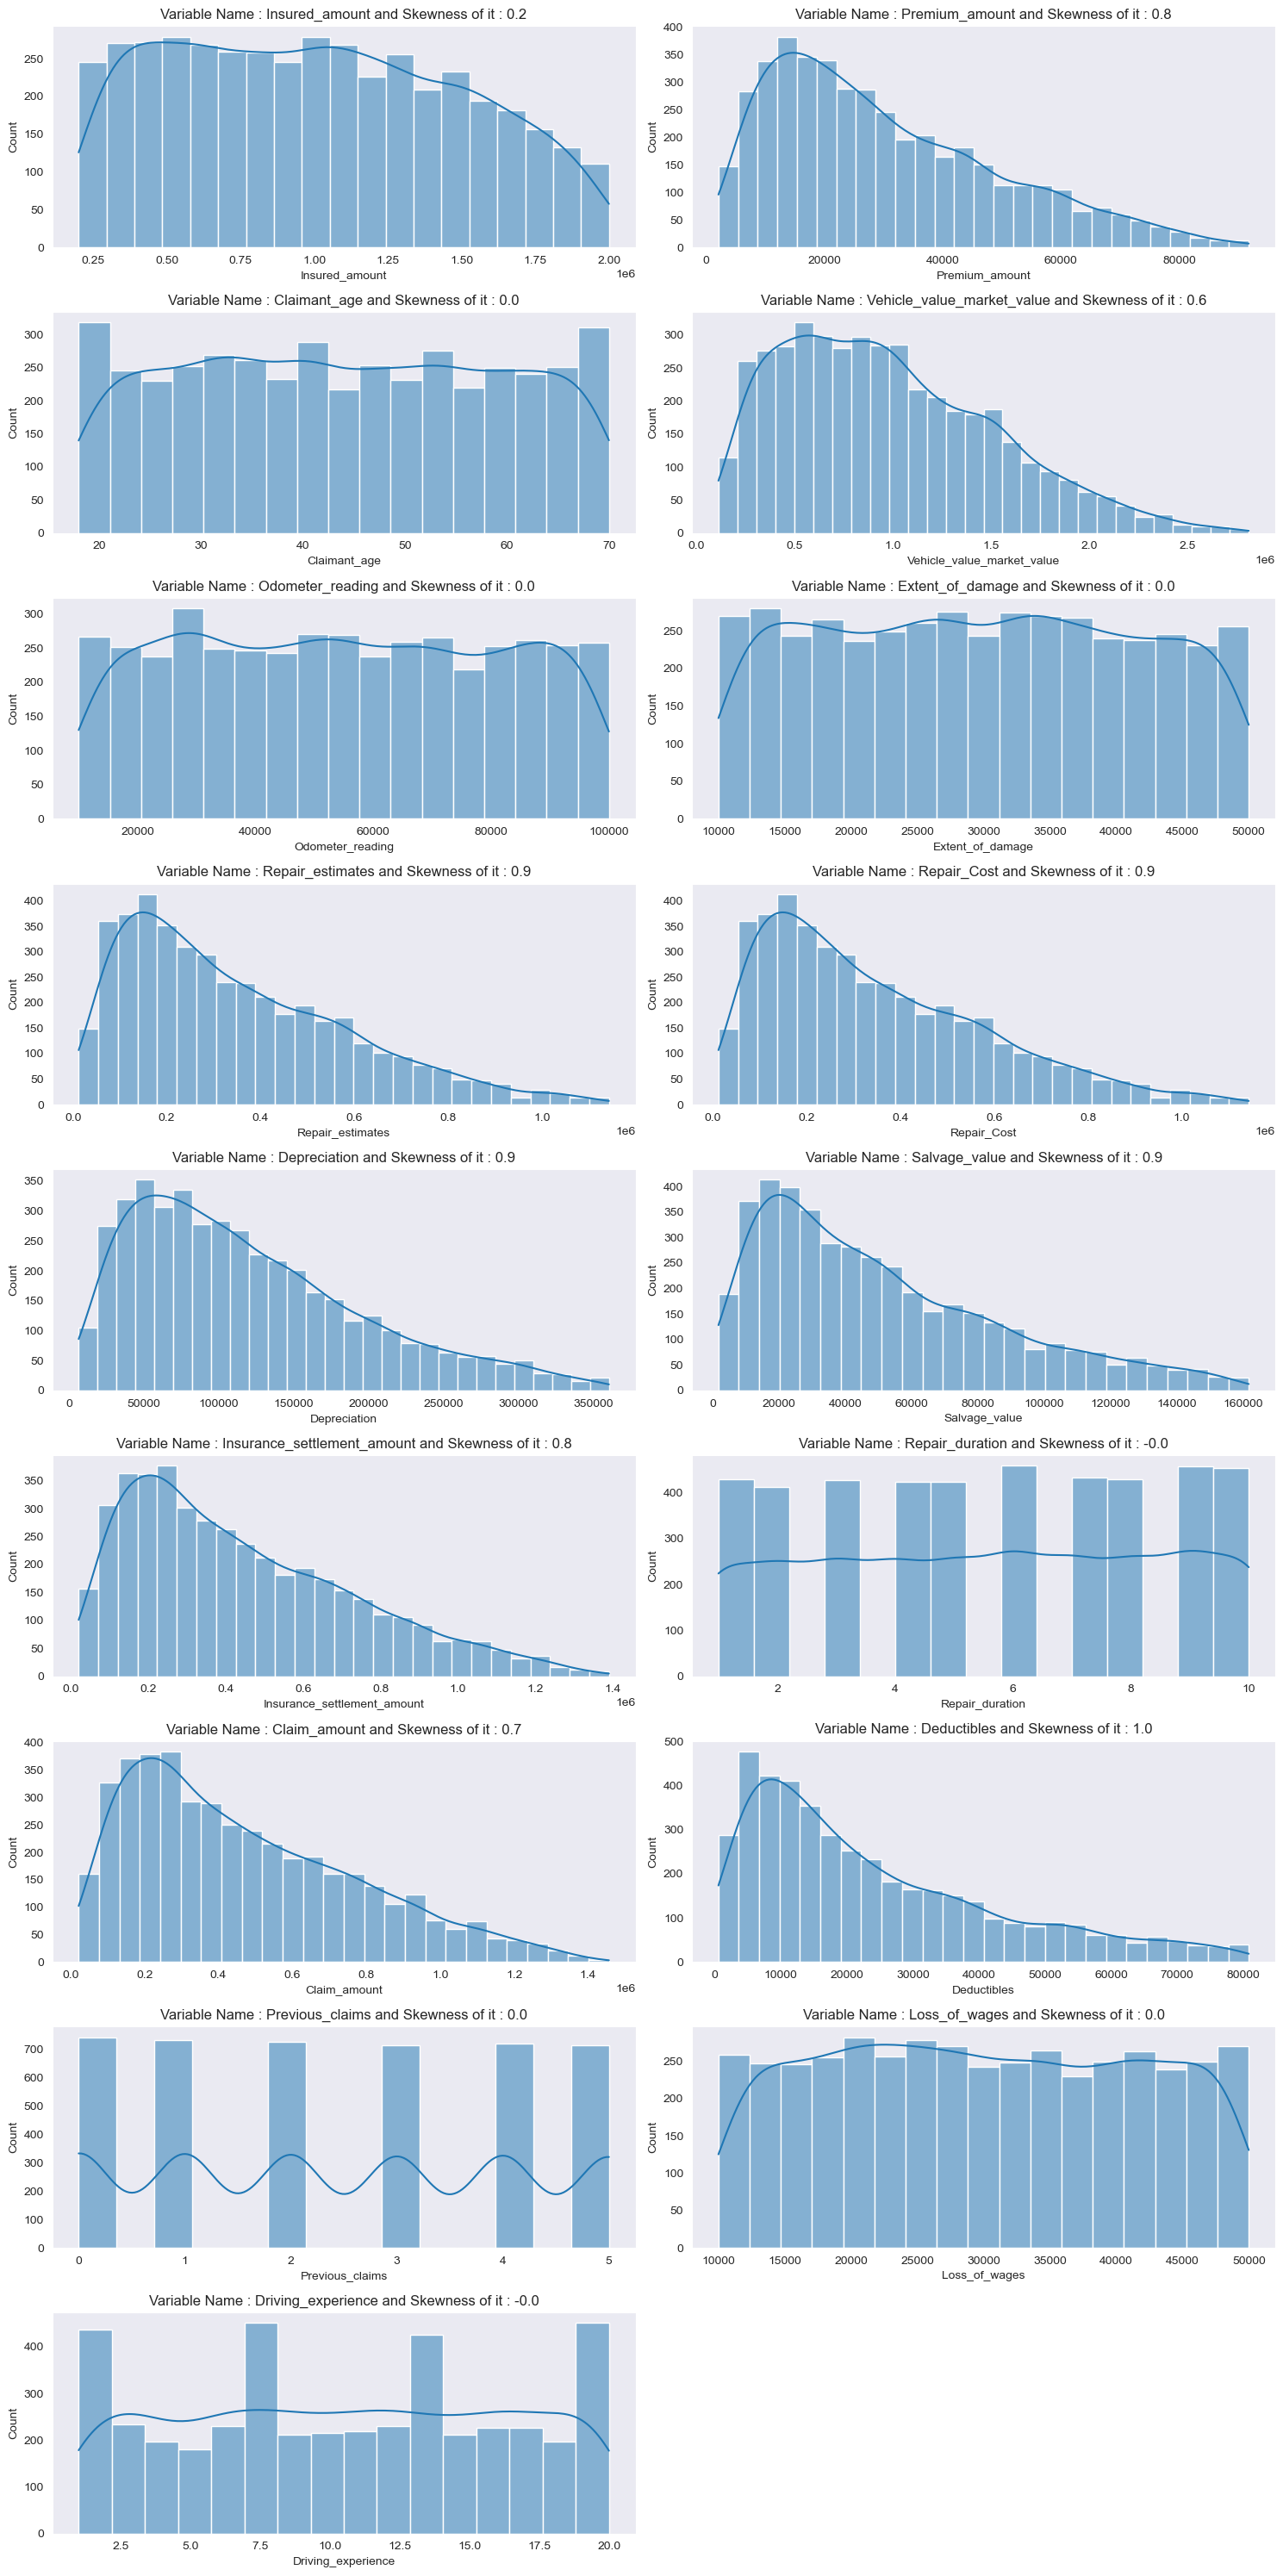

In [16]:
# Histogram
sns.set_style("dark") 
# Dropping the response variable "cost" column from the dataframe
cols = numerical_cols
print('Input variables :',cols)
# Building plot for each variables 
#Create new figure with specific size so it allows for multiple subplots to be displayed without overlapping
plt.figure(figsize=(15, 30) )

for count, item in enumerate(cols, 1): 
    plt.subplot(9, 2, count) 
    sns.histplot(df_cleaned[item], kde=True)
    skewness = round(df_cleaned[item].skew(),1)
    plt.title(f"Variable Name : {item} and Skewness of it : {skewness}")

plt.tight_layout() 
plt.show() 

In [17]:
#Apply Standard scaler standardization on numerical attibutes
from sklearn.preprocessing import StandardScaler
list1 = numerical_columns 
scaler=StandardScaler()
df_cleaned[list1] = scaler.fit_transform(df_cleaned[list1])
df_cleaned.describe()

,Insured_amount,Premium_amount,Claimant_age,Vehicle_value_market_value,Odometer_reading,Extent_of_damage,Repair_estimates,Repair_Cost,Depreciation,Salvage_value,Insurance_settlement_amount,Repair_duration,Claim_amount,Deductibles,Previous_claims,Loss_of_wages,Driving_experience,Number_of_days
count,4.346000e+03,4346.000000,4346.00000,4.346000e+03,4346.000000,4346.000000,4.346000e+03,4.346000e+03,4.346000e+03,4.346000e+03,4.346000e+03,4346.000000,4.346000e+03,4.346000e+03,4346.000000,4346.000000,4346.000000,4346.000000
mean,1.004248e+06,0.000000,43.88081,9.155636e-17,54718.543488,29746.893925,1.389695e-16,1.389695e-16,-9.809610e-18,-6.376246e-17,-6.049259e-17,5.568799,3.923844e-17,5.313539e-17,2.477911,29916.353889,10.530143,174.501150
std,4.849714e+05,1.000115,15.19109,1.000115e+00,26047.139761,11509.283658,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,2.878512,1.000115e+00,1.000115e+00,1.711155,11514.759318,5.761995,105.871538
min,2.001080e+05,-1.458484,18.00000,-1.598540e+00,10025.000000,10006.000000,-1.417350e+00,-1.417350e+00,-1.469698e+00,-1.348664e+00,-1.448084e+00,1.000000,-1.461847e+00,-1.232624e+00,0.000000,10002.000000,1.000000,-4.000000
25%,5.865832e+05,-0.798175,31.00000,-7.970125e-01,31711.750000,19692.250000,-8.040144e-01,-8.040144e-01,-7.947470e-01,-8.047814e-01,-8.014523e-01,3.000000,-8.049302e-01,-7.885949e-01,1.000000,20139.250000,6.000000,82.000000
50%,9.869465e+05,-0.234743,44.00000,-1.508473e-01,54421.500000,29684.500000,-2.460661e-01,-2.460661e-01,-2.099155e-01,-2.486575e-01,-2.194419e-01,6.000000,-2.277983e-01,-3.125503e-01,2.000000,29617.000000,11.000000,172.000000
75%,1.393597e+06,0.638743,57.00000,6.791455e-01,77507.750000,39438.500000,6.396807e-01,6.396807e-01,5.872925e-01,6.151426e-01,6.464199e-01,8.000000,6.625457e-01,5.764603e-01,4.000000,39988.500000,16.000000,266.000000
max,1.999703e+06,3.176417,70.00000,3.391120e+00,99990.000000,49998.000000,3.316683e+00,3.316683e+00,3.116832e+00,3.005442e+00,3.208425e+00,10.000000,3.210122e+00,2.955744e+00,5.000000,49992.000000,20.000000,360.000000


In [18]:
df_cleaned.head(5)

,Policy_number,Type,Coverage,Coverage_Add_Ons,Policy_Status,Validity,Insured_amount,Premium_amount,Issuance_date,Payment_status,...,Fraud_detection_approval,Driver_license,Driver_history,Driving_experience,Previous_traffic_violations,License_expiry_date,Alcohol_drug_test_results,License_class_if_applicable,License_Type,Number_of_days
0,POL91142091,Car Insurance,Comprehensive,Road side assistance (24*7),Suspended,2024-12-12 to 2025-08-22,1788284,1.958701,2025-03-10,Paid,...,True,DL1927770604,Clean driving record,6,1 parking violation,2025-05-25,Passed,HGV,Permanent,152
1,POL99025488,Car Insurance,Third Party,No Claim Bonus,Cancelled,2024-04-04 to 2025-11-17,1268543,0.428941,2024-07-07,Pending,...,False,DL8476940969,Clean driving record,1,1 speeding,2027-01-28,Passed,LMV,Learning,239
2,POL23635842,Car Insurance,Accidental Coverage,Road side assistance (24*7),Effective,2025-02-06 to 2026-02-04,660740,-0.633967,2024-06-17,Paid,...,False,DL3072939753,One speeding ticket,15,1 speeding,2029-09-13,Failed,HGV,Learning,318
3,POL67645878,Car Insurance,Accidental Coverage,No Claim Bonus,Effective,2025-02-19 to 2026-02-14,1073115,0.552870,2024-06-15,Paid,...,True,DL8035241735,One traffic violation,11,1 parking violation,2025-05-26,Failed,LMV,Learning,328
4,POL63547538,Car Insurance,Comprehensive,Road side assistance (24*7),Cancelled,2025-02-09 to 2025-12-18,592923,-1.096164,2024-08-22,Pending,...,True,DL1710473124,2 minor accidents,11,1 parking violation,2026-09-20,Failed,LMV,Learning,270


# Vector encodding to convert categorical attributes to numerical

In [19]:
!pip install pandas numpy tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Identify categorical attributes
categorical_columns = ["Type", "Coverage", "Coverage_Add_Ons", "Policy_Status", "Payment_status", "Payment_Frequency", 
                       "Claim_status","Vehicle_condition", "Vehicle_type_sedan_SUV_etc", "Claim_verification", "Fraud_detection_approval",
                       "Fuel_type", "Insurance_coverage_type", "Nature_of_incident", "Incident_severity_level", "Driver_history",
                       "Weather_conditions_at_the_time_of_the_accident", "Cause_of_incident", "License_class_if_applicable","Alcohol_drug_test_results","Driver_medical_history", 
                       "License_Type","Previous_traffic_violations","Driver_history", "Previous_traffic_violations"]

# Encode categorical attributes using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Define embedding dimensions
embedding_dims = {col: min(50, len(df[col].unique()) // 2) for col in categorical_columns}

# Create embedding layers using TensorFlow
embedding_layers = {}
for col in categorical_columns:
    input_dim = len(df_cleaned[col].unique())
    output_dim = embedding_dims[col]
    embedding_layers[col] = tf.keras.layers.Embedding(input_dim=input_dim, output_dim=output_dim)

# Create a simple model to train embeddings
inputs = {col: tf.keras.layers.Input(shape=(1,), name=col) for col in categorical_columns}
embeddings = {col: embedding_layers[col](inputs[col]) for col in categorical_columns}
concatenated_embeddings = tf.keras.layers.Concatenate()(list(embeddings.values()))
flattened_embeddings = tf.keras.layers.Flatten()(concatenated_embeddings)
dense_layer = tf.keras.layers.Dense(128, activation='relu')(flattened_embeddings)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dense_layer)

model = tf.keras.Model(inputs=list(inputs.values()), outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy')

# Prepare the data for training
X = {col: df_cleaned[col].values for col in categorical_columns}
y = np.random.randint(0, 2, size=(df_cleaned.shape[0],))  # Dummy target variable for demonstration

# Train the model
model.fit(X, y, epochs=5, batch_size=32)

# Extract embeddings
embeddings_dict = {}
for col in categorical_columns:
    embeddings_dict[col] = embedding_layers[col].get_weights()[0]

# Example: Get embedding for a specific category
example_category = df_cleaned["Type"].iloc[0]
example_embedding = embeddings_dict["Type"][example_category]
print(f"Embedding for category '{example_category}' in 'Type': {example_embedding}")

KeyError: 'Driver_medical_history'

In [ ]:
df_cleaned.head(5)

 # Feature Creation

Use the insurance validity attribute to create a new continuous numeric attribute - number of days

In [ ]:
from datetime import datetime
# Function to calculate the number of days from the Validity column
def calculate_days(validity):
    start_date, end_date = validity.split(' to ')
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')
    return (end_date - start_date).days

# Apply the function to the Validity column
df_cleaned['Number_of_days'] = df_cleaned['Validity'].apply(calculate_days)

# Display the DataFrame
print(df_cleaned['Number_of_days'])

Drop validity attribute as we added Number of days attribute

In [ ]:
df_cleaned = df_cleaned.drop(['Validity'], axis=1)

In [ ]:
df_cleaned.shape

# Bivariate Analysis - Claim amount vs numeric attributes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# List of independent variables
independent_vars = ['Premium_amount', 'Vehicle_value_market_value', 'Repair_estimates', 'Repair_Cost', 'Depreciation', 'Salvage_value', 'Insurance_settlement_amount', 'Deductibles']

# Target variable
target_var = 'Claim_amount'

# Function to plot scatter plot with regression line
def plot_scatter_with_regression(df_cleaned, x_var, y_var):
    sns.lmplot(x=x_var, y=y_var, data=df_cleaned, aspect=1.5, ci=None)
    plt.title(f'Scatter plot with regression line: {x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.show()

# Generate scatter plots with regression lines for each independent variable
for var in independent_vars:
    plot_scatter_with_regression(df_cleaned, var, target_var)


# Multivariate Analysis - Pearson Correaltion HeatMap

In [ ]:
# Calculate Pearson correlation matrix
# List of numeric attributes
numeric_attributes = [
    "Insured_amount", "Premium_amount", "Claim_amount", "Deductibles", 
    "Vehicle_value_market_value", "Repair_estimates", "Depreciation", 
    "Salvage_value", "Insurance_settlement_amount", "Coverage", 
    "Coverage_Add_Ons", "Policy_Status", "Driver_history", 
    "Driving_experience", "Alcohol_drug_test_results", "License_class_if_applicable"
]

# Calculate the Pearson correlation matrix
correlation_matrix = df_cleaned[numeric_attributes].corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)

# Set the title
plt.title('Pearson Correlation Heatmap')

# Show the plot
plt.show()

# Dataset Summary - Pandas Profiling

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport  # pandas-profiling is now ydata-profiling
import warnings
from pandas.errors import PerformanceWarning
 
# Generate profile report
profile = ProfileReport(df_cleaned, explorative=True)
 
# Save report as an interactive HTML file
profile.to_file("pandas_profiling_report.html")
 
# Display in Jupyter Notebook (Optional)
profile.to_notebook_iframe()